In [208]:
import pandas as pd # For reading and manipulating the set of data
import matplotlib as mpl # For visualizing data
import matplotlib.pyplot as plt #For visualizing data
import seaborn as sn # Correlation matrix

import numpy as np #For handling data in a vectorized manner

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import datetime as dt

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error

import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold

In [209]:
pd.set_option("display.max_columns", None)

In [210]:
df_raw = pd.read_csv("crimes_cams_density.csv")

In [211]:
df_raw.head()

,idcarpeta,delito,categoria,alcaldia,colonia,sexo_fem,edad,anio_hecho,colonia_al,crimen_lat,crimen_lon,hecho_time,denuncia_t,cams_in_crime_20m,cams_in_crime_50m,cams_in_crime_100m,cams_in_crime_250m,cams_in_crime_500m,crimes_metro_20m,metro_in_crimes_50m,metro_in_crimes_100m,metro_in_crimes_250m,metro_in_crimes_500m,vial_20,vial_50,vial_100,vial_250,vial_500,pob2010,pob2020,denpob2010,denpob2020,dif_denpob,area_ha,vivhab2010,vivhab2020,denviv2010,denviv2020,crimes_in_col,den_crime
0,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,CUAUHTEMOC,DOCTORES,0,39,2018,DOCTORES I,19.42244,-99.15237,12/25/2018,1/4/2019,0,0,2,10,33,0,0,0,0,2,0,0,0,1,1,44703,49787,178.703117,199.026734,20.323617,250.152324,14477,17616,57.872738,70.421093,4463,17.841130
1,8324482,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,MORELOS,0,40,2018,MORELOS II,19.44962,-99.12782,12/23/2018,1/4/2019,0,0,2,10,32,0,0,0,0,0,0,0,0,1,1,34684,35005,317.403934,320.341504,2.937570,109.274008,10042,10711,91.897425,98.019650,1436,13.141277
2,8324485,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,ROMA NORTE,0,37,2018,ROMA NORTE III,19.41359,-99.15729,12/31/2018,1/4/2019,0,0,0,8,30,0,0,0,0,1,0,0,0,1,1,27770,25611,119.973900,110.646437,-9.327463,231.467010,10776,11296,46.555231,48.801771,5917,25.563038
3,8324496,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,JUAREZ,0,36,2019,JUAREZ,19.42676,-99.16640,1/3/2019,1/4/2019,0,0,2,11,40,0,0,0,0,0,0,0,1,1,1,10184,8542,65.050659,54.562326,-10.488333,156.554908,4045,4130,25.837580,26.380521,3921,25.045526
4,8324527,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,0,32,2018,GUERRERO III,19.43769,-99.14753,12/22/2018,1/4/2019,0,1,2,10,39,0,1,2,2,2,1,1,1,1,1,42339,47116,276.852785,308.089370,31.236585,152.929652,13013,15631,85.091412,102.210394,3172,20.741563


In [212]:
df_raw[df_raw.columns[14:27]].head()

,cams_in_crime_50m,cams_in_crime_100m,cams_in_crime_250m,cams_in_crime_500m,crimes_metro_20m,metro_in_crimes_50m,metro_in_crimes_100m,metro_in_crimes_250m,metro_in_crimes_500m,vial_20,vial_50,vial_100,vial_250
0,0,2,10,33,0,0,0,0,2,0,0,0,1
1,0,2,10,32,0,0,0,0,0,0,0,0,1
2,0,0,8,30,0,0,0,0,1,0,0,0,1
3,0,2,11,40,0,0,0,0,0,0,0,1,1
4,1,2,10,39,0,1,2,2,2,1,1,1,1


In [213]:
df_raw[df_raw.columns[27:]].head()

,vial_500,pob2010,pob2020,denpob2010,denpob2020,dif_denpob,area_ha,vivhab2010,vivhab2020,denviv2010,denviv2020,crimes_in_col,den_crime
0,1,44703,49787,178.703117,199.026734,20.323617,250.152324,14477,17616,57.872738,70.421093,4463,17.841130
1,1,34684,35005,317.403934,320.341504,2.937570,109.274008,10042,10711,91.897425,98.019650,1436,13.141277
2,1,27770,25611,119.973900,110.646437,-9.327463,231.467010,10776,11296,46.555231,48.801771,5917,25.563038
3,1,10184,8542,65.050659,54.562326,-10.488333,156.554908,4045,4130,25.837580,26.380521,3921,25.045526
4,1,42339,47116,276.852785,308.089370,31.236585,152.929652,13013,15631,85.091412,102.210394,3172,20.741563


In [214]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61886 entries, 0 to 61885
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idcarpeta             61886 non-null  int64  
 1   delito                61886 non-null  object 
 2   categoria             61886 non-null  object 
 3   alcaldia              61886 non-null  object 
 4   colonia               61886 non-null  object 
 5   sexo_fem              61886 non-null  int64  
 6   edad                  61886 non-null  int64  
 7   anio_hecho            61886 non-null  int64  
 8   colonia_al            61886 non-null  object 
 9   crimen_lat            61886 non-null  float64
 10  crimen_lon            61886 non-null  float64
 11  hecho_time            61886 non-null  object 
 12  denuncia_t            61886 non-null  object 
 13  cams_in_crime_20m     61886 non-null  int64  
 14  cams_in_crime_50m     61886 non-null  int64  
 15  cams_in_crime_100m 

In [215]:
df_raw.shape

(61886, 40)

In [216]:
df_raw.describe()

,idcarpeta,sexo_fem,edad,anio_hecho,crimen_lat,crimen_lon,cams_in_crime_20m,cams_in_crime_50m,cams_in_crime_100m,cams_in_crime_250m,cams_in_crime_500m,crimes_metro_20m,metro_in_crimes_50m,metro_in_crimes_100m,metro_in_crimes_250m,metro_in_crimes_500m,vial_20,vial_50,vial_100,vial_250,vial_500,pob2010,pob2020,denpob2010,denpob2020,dif_denpob,area_ha,vivhab2010,vivhab2020,denviv2010,denviv2020,crimes_in_col,den_crime
count,6.188600e+04,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000,61886.000000
mean,8.834985e+06,0.284281,36.566477,2020.456517,19.429746,-99.149338,0.167372,0.524044,1.422955,8.220825,32.311654,0.023705,0.063972,0.128575,0.396164,1.109572,0.347865,0.487994,0.627622,0.890298,0.995783,31358.573538,30890.329428,154.357094,156.682737,2.325643,220.156285,10045.209498,10739.056200,50.790982,56.591327,5231.300682,21.876902
std,3.311114e+05,0.451075,11.069196,1.306960,0.014996,0.013829,0.378512,0.564635,0.830638,2.612807,7.988260,0.152129,0.255243,0.373907,0.657684,1.032086,0.476297,0.499860,0.483442,0.312520,0.064805,20661.888223,19676.991817,62.421607,70.633366,16.181151,164.194593,5903.747809,5916.675355,17.774099,22.953146,4639.875151,7.529125
min,4.928620e+06,0.000000,0.000000,2015.000000,19.399900,-99.184187,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2107.000000,2568.000000,57.665485,54.562326,-29.911206,12.487345,619.000000,807.000000,21.922416,24.552400,100.000000,4.995763
25%,8.528677e+06,0.000000,30.000000,2019.000000,19.417719,-99.160601,0.000000,0.000000,1.000000,6.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11880.000000,12477.000000,121.207532,111.428409,-9.327463,108.011973,4988.000000,5733.000000,36.478956,35.385763,1930.000000,15.541822
50%,8.817686e+06,0.000000,36.000000,2020.000000,19.428842,-99.148510,0.000000,0.000000,1.000000,8.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,27770.000000,25611.000000,124.166637,131.813423,0.993922,156.554908,10776.000000,11296.000000,46.555231,51.753437,3921.000000,22.800090
75%,9.119424e+06,1.000000,40.000000,2022.000000,19.441420,-99.137860,0.000000,1.000000,2.000000,10.000000,37.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44703.000000,49787.000000,178.703117,199.026734,9.730403,250.152324,14477.000000,17616.000000,57.872738,70.421093,5917.000000,26.506996
max,1.107864e+07,1.000000,96.000000,2023.000000,19.465514,-99.122445,2.000000,3.000000,5.000000,17.000000,55.000000,1.000000,2.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63135.000000,58499.000000,328.239308,397.527552,89.415382,510.431275,18620.000000,18062.000000,92.863246,134.947104,13530.000000,40.078890


It can be seen that the time of this dataset is 2016-2023

### 1. Feature engineering

In [217]:
delito_tipos = ['ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA'
            'ROBO A REPARTIDOR SIN VIOLENCIA',
             'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA',
            'ROBO DE ACCESORIOS DE AUTO', 
            'ROBO DE MOTOCICLETA SIN VIOLENCIA',
             'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
            'ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA',
            'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
            'ROBO A NEGOCIO SIN VIOLENCIA', 
            'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
            'ROBO DE VEHICULO DE SERVICIO PUBLICO SIN VIOLENCIA',
        'ROBO DE VEHICULO DE PEDALES',
        'ROBO A REPARTIDOR CON VIOLENCIA',
        'ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA'
        'ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA',
        'ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA',
        'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
        'ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA',
        'ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA',
        'PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO',
        'ROBO DE PLACA DE AUTOMOVIL',
        'ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA',
        'ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA',
        'SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSION)',
        'ROBO DE MOTOCICLETA CON VIOLENCIA',
        'ROBO DE VEHICULO DE SERVICIO PUBLICO CON VIOLENCIA'
        'ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA',
        'ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA',
        'ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA',
        'ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA',
        'ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA',
        'ROBO DE MERCANCIA A TRANSPORTISTA C/V',
        'ROBO DE VEHICULO ELECTRICO MOTOPATIN',
        'ROBO A TRANSEUNTE EN CINE CON VIOLENCIA'
]

In [218]:
# Recording to crimes considered more probable to be recorded.
df2_raw = df_raw[df_raw['delito'].isin(delito_tipos)] 

In [219]:
df2_raw.shape

(26706, 40)

In [220]:
# Changing columns to datatime type
df2_raw['hecho_time']= pd.to_datetime(df2_raw['hecho_time'])
#df2_raw['fecha_hech']= pd.to_datetime(df2_raw['fecha_hech'])

C:\Users\K. Damian\AppData\Local\Temp\ipykernel_16088\3785807652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_raw['hecho_time']= pd.to_datetime(df2_raw['hecho_time'])


In [221]:
# Extracting hour and weekday of event
df2_raw['Hour_e'] = df2_raw['hecho_time'].dt.hour
df2_raw['Weekdaynum_e']=df2_raw["hecho_time"].dt.weekday
df2_raw['Month_e']=df2_raw["hecho_time"].dt.month

C:\Users\K. Damian\AppData\Local\Temp\ipykernel_16088\3491719423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_raw['Hour_e'] = df2_raw['hecho_time'].dt.hour
C:\Users\K. Damian\AppData\Local\Temp\ipykernel_16088\3491719423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_raw['Weekdaynum_e']=df2_raw["hecho_time"].dt.weekday
C:\Users\K. Damian\AppData\Local\Temp\ipykernel_16088\3491719423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [222]:
# Ranaming columns
#e = event(crime), p=plaintiff(victim)
df2_raw.rename(columns =  {'anio_hecho': 'Year_e', 'delito':'Crime_type', 'categoria': 'Category', 'sexo_fem':'Gender_p', \
                           'edad': 'Age_p', 'alcaldia':'Neighbourhood', 'fecha_hech':'Date_e', \
                           'crimen_lon':'Longitude_e', 'crimen_lat':'Latitude_e', 'cams_100':'Num_cams_100', \
                           'metro_in_crimes_100m':'Num_subway_100', 'vial_100':'Num_roads_100', 'cams_in_crime_100m':'Num_crimes_100', \
                           'crimes_in_col':'Crimes per Neigh'
}, inplace = True)

C:\Users\K. Damian\AppData\Local\Temp\ipykernel_16088\3202295569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_raw.rename(columns =  {'anio_hecho': 'Year_e', 'delito':'Crime_type', 'categoria': 'Category', 'sexo_fem':'Gender_p', \


In [223]:
df2_raw.head()

,idcarpeta,Crime_type,Category,Neighbourhood,colonia,Gender_p,Age_p,Year_e,colonia_al,Latitude_e,Longitude_e,hecho_time,denuncia_t,cams_in_crime_20m,cams_in_crime_50m,Num_crimes_100,cams_in_crime_250m,cams_in_crime_500m,crimes_metro_20m,metro_in_crimes_50m,Num_subway_100,metro_in_crimes_250m,metro_in_crimes_500m,vial_20,vial_50,Num_roads_100,vial_250,vial_500,pob2010,pob2020,denpob2010,denpob2020,dif_denpob,area_ha,vivhab2010,vivhab2020,denviv2010,denviv2020,Crimes per Neigh,den_crime,Hour_e,Weekdaynum_e,Month_e
6,8324568,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,BUENAVISTA,1,34,2019,BUENAVISTA II,19.44552,-99.14842,2019-01-02,1/4/2019,0,0,3,9,35,0,0,0,0,3,1,1,1,1,1,15605,16656,144.474724,154.205127,9.730403,108.011973,4988,5810,46.180066,53.790333,4329,40.078890,0,2,1
10,8324675,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,CUAUHTEMOC,SAN SIMON TOLNAHUAC,1,49,2018,SAN SIMON TOLNAHUAC,19.45758,-99.14314,2018-01-03,1/4/2019,0,1,1,9,33,0,0,0,0,1,0,0,0,1,1,9885,11138,174.855058,197.019286,22.164227,56.532537,3112,4032,55.047946,71.321760,866,15.318612,0,2,1
11,8324684,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,CENTRO,0,54,2018,CENTRO IV,19.43369,-99.12987,2018-12-23,1/4/2019,0,1,2,6,38,0,0,0,0,1,0,0,0,0,1,63135,58499,123.689521,114.607006,-9.082516,510.431275,18620,18062,36.478956,35.385763,13530,26.506996,0,6,12
12,8324691,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHICULO CON Y SIN VIOLENCIA,CUAUHTEMOC,MORELOS,1,50,2019,MORELOS III,19.44630,-99.13053,2019-01-04,1/4/2019,0,1,2,7,38,0,0,0,0,1,0,0,0,0,1,34684,35005,317.403934,320.341504,2.937570,109.274008,10042,10711,91.897425,98.019650,1436,13.141277,0,4,1
13,8324709,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,CUAUHTEMOC,AMPL. ASTURIAS,0,27,2019,ASTURIAS (AMPL),19.40671,-99.13551,2019-01-04,1/4/2019,0,0,2,9,29,0,0,0,0,3,0,0,1,1,1,5708,5740,177.290751,178.284672,0.993922,32.195701,1806,1941,56.094446,60.287552,733,22.767015,0,4,1


In [224]:
df3_raw = pd.read_csv("transeunte_complete3.csv")

In [225]:
df3_raw['hora_hecho']= pd.to_datetime(df3_raw['hora_hecho'])

C:\Users\K. Damian\AppData\Local\Temp\ipykernel_16088\4050781531.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3_raw['hora_hecho']= pd.to_datetime(df3_raw['hora_hecho'])


In [226]:
df3_raw['Hour_e']= df3_raw['hora_hecho'].dt.hour

In [227]:
x = df3_raw[['idcarpeta', 'Hour_e']]

In [228]:
x.head()

,idcarpeta,Hour_e
0,8324479,4
1,8324568,19
2,8324684,16
3,8324783,22
4,8324805,21


In [229]:
df = pd.merge(df2_raw, x, on='idcarpeta', how='left')

In [268]:
df.head()

,idcarpeta,Crime_type,Category,Neighbourhood,colonia,Gender_p,Age_p,Year_e,colonia_al,Latitude_e,Longitude_e,hecho_time,denuncia_t,cams_in_crime_20m,cams_in_crime_50m,Num_crimes_100,cams_in_crime_250m,cams_in_crime_500m,crimes_metro_20m,metro_in_crimes_50m,Num_subway_100,metro_in_crimes_250m,metro_in_crimes_500m,vial_20,vial_50,Num_roads_100,vial_250,vial_500,pob2010,pob2020,denpob2010,denpob2020,dif_denpob,area_ha,vivhab2010,vivhab2020,denviv2010,denviv2020,Crimes per Neigh,den_crime,Hour_e_x,Weekdaynum_e,Month_e,Hour_e
0,8324568,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,BUENAVISTA,1,34,2019,BUENAVISTA II,19.44552,-99.14842,2019-01-02,1/4/2019,0,0,3,9,35,0,0,0,0,3,1,1,1,1,1,15605,16656,144.474724,154.205127,9.730403,108.011973,4988,5810,46.180066,53.790333,4329,40.078890,0,2,1,19.0
1,8324675,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,CUAUHTEMOC,SAN SIMON TOLNAHUAC,1,49,2018,SAN SIMON TOLNAHUAC,19.45758,-99.14314,2018-01-03,1/4/2019,0,1,1,9,33,0,0,0,0,1,0,0,0,1,1,9885,11138,174.855058,197.019286,22.164227,56.532537,3112,4032,55.047946,71.321760,866,15.318612,0,2,1,NaN
2,8324684,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,CENTRO,0,54,2018,CENTRO IV,19.43369,-99.12987,2018-12-23,1/4/2019,0,1,2,6,38,0,0,0,0,1,0,0,0,0,1,63135,58499,123.689521,114.607006,-9.082516,510.431275,18620,18062,36.478956,35.385763,13530,26.506996,0,6,12,16.0
3,8324684,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,CENTRO,0,54,2018,CENTRO IV,19.43369,-99.12987,2018-12-23,1/4/2019,0,1,2,6,38,0,0,0,0,1,0,0,0,0,1,63135,58499,123.689521,114.607006,-9.082516,510.431275,18620,18062,36.478956,35.385763,13530,26.506996,0,6,12,16.0
4,8324691,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHICULO CON Y SIN VIOLENCIA,CUAUHTEMOC,MORELOS,1,50,2019,MORELOS III,19.44630,-99.13053,2019-01-04,1/4/2019,0,1,2,7,38,0,0,0,0,1,0,0,0,0,1,34684,35005,317.403934,320.341504,2.937570,109.274008,10042,10711,91.897425,98.019650,1436,13.141277,0,4,1,NaN


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27812 entries, 0 to 27811
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   idcarpeta             27812 non-null  int64         
 1   Crime_type            27812 non-null  object        
 2   Category              27812 non-null  object        
 3   Neighbourhood         27812 non-null  object        
 4   colonia               27812 non-null  object        
 5   Gender_p              27812 non-null  int64         
 6   Age_p                 27812 non-null  int64         
 7   Year_e                27812 non-null  int64         
 8   colonia_al            27812 non-null  object        
 9   Latitude_e            27812 non-null  float64       
 10  Longitude_e           27812 non-null  float64       
 11  hecho_time            27812 non-null  datetime64[ns]
 12  denuncia_t            27812 non-null  object        
 13  cams_in_crime_20

In [231]:
df.rename(columns =  {'Hour_e_y':'Hour_e'
}, inplace = True)

Only kept data of events at 100 around meters for simplicity of analysis

In [232]:
# Selecting columns of interest
df_neat = df[['Category', 'Crime_type', 'Neighbourhood', 'Gender_p', 'Age_p', \
                   'Year_e', 'Month_e', 'Weekdaynum_e', 'Hour_e', 'Num_subway_100', \
                   'Num_roads_100', 'Num_crimes_100', 'Crimes per Neigh', 'Longitude_e', 'Latitude_e']].reset_index(drop=True)

In [233]:
# Because of the data complexity it's decided to drop null values instead of using a kind of calculus (average, sum, etc...)
df_neat.dropna(inplace=True)

In [234]:
# Checking dimensions of clean dataset
df_neat.shape

(9142, 15)

In [235]:
df_neat.head()

,Category,Crime_type,Neighbourhood,Gender_p,Age_p,Year_e,Month_e,Weekdaynum_e,Hour_e,Num_subway_100,Num_roads_100,Num_crimes_100,Crimes per Neigh,Longitude_e,Latitude_e
0,DELITO DE BAJO IMPACTO,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,CUAUHTEMOC,1,34,2019,1,2,19.0,0,1,3,4329,-99.14842,19.44552
2,DELITO DE BAJO IMPACTO,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,CUAUHTEMOC,0,54,2018,12,6,16.0,0,0,2,13530,-99.12987,19.43369
3,DELITO DE BAJO IMPACTO,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,CUAUHTEMOC,0,54,2018,12,6,16.0,0,0,2,13530,-99.12987,19.43369
6,DELITO DE BAJO IMPACTO,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,CUAUHTEMOC,0,23,2019,1,3,22.0,0,1,1,2453,-99.16442,19.44545
7,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,CUAUHTEMOC,1,42,2018,12,3,21.0,1,1,3,13530,-99.13303,19.42623


In [236]:
df_neat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 27809
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9142 non-null   object 
 1   Crime_type        9142 non-null   object 
 2   Neighbourhood     9142 non-null   object 
 3   Gender_p          9142 non-null   int64  
 4   Age_p             9142 non-null   int64  
 5   Year_e            9142 non-null   int64  
 6   Month_e           9142 non-null   int32  
 7   Weekdaynum_e      9142 non-null   int32  
 8   Hour_e            9142 non-null   float64
 9   Num_subway_100    9142 non-null   int64  
 10  Num_roads_100     9142 non-null   int64  
 11  Num_crimes_100    9142 non-null   int64  
 12  Crimes per Neigh  9142 non-null   int64  
 13  Longitude_e       9142 non-null   float64
 14  Latitude_e        9142 non-null   float64
dtypes: float64(3), int32(2), int64(7), object(3)
memory usage: 1.0+ MB


### 2. First statistical analysis and visualization
In this stage, it will be tested the popular wisdom about streets as "It is more probably been a victim of a crime at evening than noon" or "There are more crimes on Friday and weekends", "The end of the year is more dangerous", things like that.

It will be done a few mini-dataframes and it will be plotted some bar graphics. To keep this part simple, the nature of crimes will be not considered.

- Searching a relatioship between the hour of crimes and quantity of them.

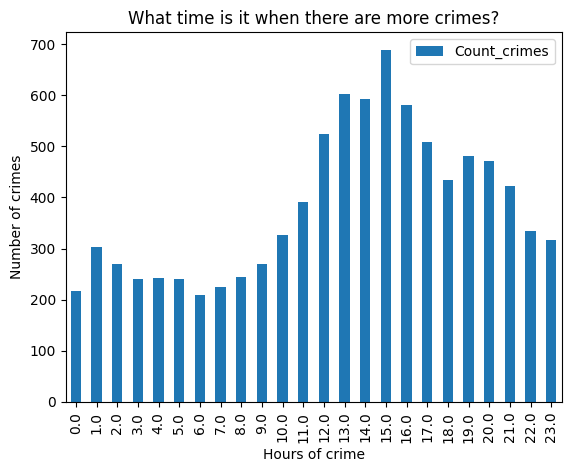

In [237]:
w = df_neat['Hour_e'].value_counts()
w1 = w.to_dict() #converts to dictionary
df_cri_hr = pd.DataFrame.from_dict(w1, orient='index')
df_cri_hr.reset_index(inplace=True)
df_cri_hr.rename(columns = {'index':'Hours of crime', 0:'Count_crimes'}, inplace = True)
df_cri_hr.reset_index(drop=True)
df_cri_hr.sort_values(by='Hours of crime', inplace=True)
#df_cri_hr

#Plotting data
ax = df_cri_hr.plot.bar(x='Hours of crime')
ax.set_ylabel('Number of crimes')
ax.set_title('What time is it when there are more crimes?')
plt.show()

Apparently the crime don't rest, but seems the more dangerous period of day is 13h - 16h

- Searching a relatioship between the weekday of crimes and quantity of them

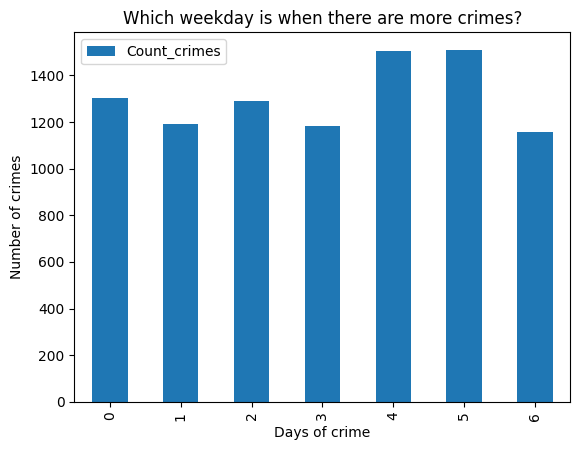

In [238]:
v = df_neat['Weekdaynum_e'].value_counts()
v1 = v.to_dict() #converts to dictionary
df_cri_day = pd.DataFrame.from_dict(v1, orient='index')
df_cri_day.reset_index(inplace=True)
df_cri_day.rename(columns = {'index':'Days of crime', 0:'Count_crimes'}, inplace = True)
df_cri_day.reset_index(drop=True)
df_cri_day.sort_values(by='Days of crime', inplace=True)
#df_cri_day

#Plotting data
ax = df_cri_day.plot.bar(x='Days of crime')
ax.set_ylabel('Number of crimes')
ax.set_title('Which weekday is when there are more crimes?')
plt.show()

Considering that Monday = 0, Thursday = 1, ..., Sunday = 6, in this case popular wisdom is right, the days with more crimes committed are Friday and Saturday.

- Searching a relatioship between the month of crimes and quantity of them.

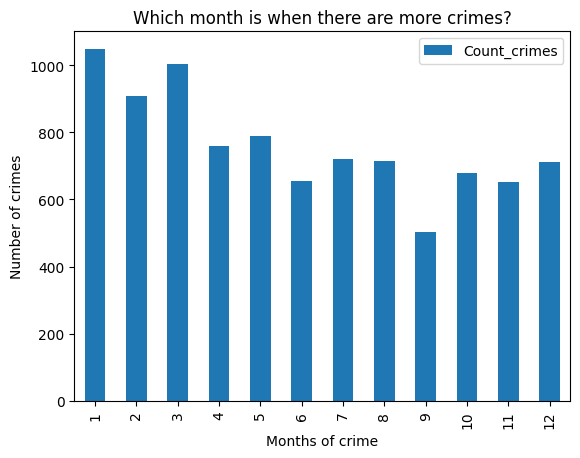

In [239]:
t = df_neat['Month_e'].value_counts()
t1 = t.to_dict() #converts to dictionary
df_cri_mth = pd.DataFrame.from_dict(t1, orient='index')
df_cri_mth.reset_index(inplace=True)
df_cri_mth.rename(columns = {'index':'Months of crime', 0:'Count_crimes'}, inplace = True)
df_cri_mth.reset_index(drop=True)
df_cri_mth.sort_values(by='Months of crime', inplace=True)
#df_cri_day

#Plotting data
ax = df_cri_mth.plot.bar(x='Months of crime')
ax.set_ylabel('Number of crimes')
ax.set_title('Which month is when there are more crimes?')
plt.show()

It can be observed that the most dangerous months are January and March. It could be by "La cuesta de enero, febrero loco y marzo otro poco"?

- Searching a relatioship between the year of crimes and quantity of them.

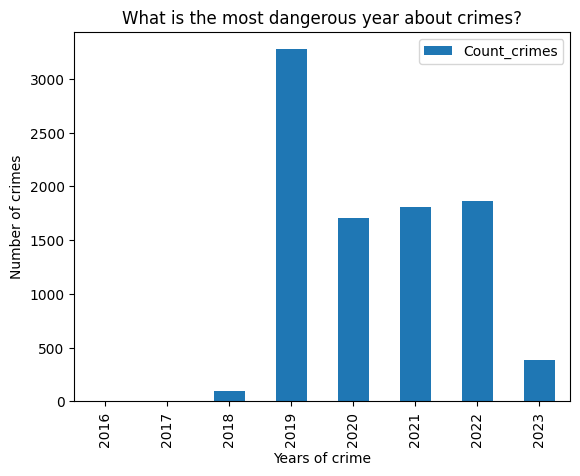

In [240]:
q = df_neat['Year_e'].value_counts()
q1 = q.to_dict() #converts to dictionary
df_cri_yr = pd.DataFrame.from_dict(q1, orient='index')
df_cri_yr.reset_index(inplace=True)
df_cri_yr.rename(columns = {'index':'Years of crime', 0:'Count_crimes'}, inplace = True)
df_cri_yr.reset_index(drop=True)
df_cri_yr.sort_values(by='Years of crime', inplace=True)
#df_cri_yr

#Plotting data
ax = df_cri_yr.plot.bar(x='Years of crime')
ax.set_ylabel('Number of crimes')
ax.set_title('What is the most dangerous year about crimes?')
plt.show()

It could be seen a decrement of number of crimes between 2019 and 2020, this mainly could be by pandemic

- Applying Pearson correlation to the dataframe with for the purpose of discover any relationship

<Axes: >

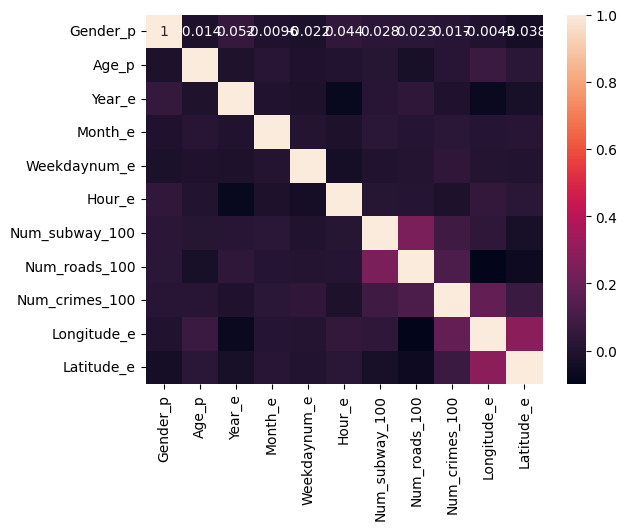

In [241]:
corrMatrix = df_neat[['Gender_p', 'Age_p', \
                   'Year_e', 'Month_e', 'Weekdaynum_e', 'Hour_e', 'Num_subway_100', \
                   'Num_roads_100', 'Num_crimes_100', 'Longitude_e', 'Latitude_e']].corr()
sn.heatmap(corrMatrix, annot=True)

It can be infered that practically there is not relationship between variables

#### 3. Calculus objective variable

Since it is believed that cameras influence criminality, we have two probabilities, the common crime probability per neighbourhood (#Number of crimes per neighborhood / Number of total crimes) and the camera-crimen probability in neighbourhoods (#Number of crimes to 100 meters around cameras / Number of crimes per neighborhood) and observe if there are differences.

In [242]:
df_neat['Prob_crime_neigh'] = df_neat['Crimes per Neigh'] / (df.shape[0])

In [243]:
df_neat['Prob_crime_cam'] = df_neat['Num_crimes_100'] / df_neat['Crimes per Neigh']

In [244]:
df_neat[df_neat.columns[13:]].head()

,Longitude_e,Latitude_e,Prob_crime_neigh,Prob_crime_cam
0,-99.14842,19.44552,0.155652,0.000693
2,-99.12987,19.43369,0.486481,0.000148
3,-99.12987,19.43369,0.486481,0.000148
6,-99.16442,19.44545,0.088199,0.000408
7,-99.13303,19.42623,0.486481,0.000222


In [245]:
df_neat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 27809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9142 non-null   object 
 1   Crime_type        9142 non-null   object 
 2   Neighbourhood     9142 non-null   object 
 3   Gender_p          9142 non-null   int64  
 4   Age_p             9142 non-null   int64  
 5   Year_e            9142 non-null   int64  
 6   Month_e           9142 non-null   int32  
 7   Weekdaynum_e      9142 non-null   int32  
 8   Hour_e            9142 non-null   float64
 9   Num_subway_100    9142 non-null   int64  
 10  Num_roads_100     9142 non-null   int64  
 11  Num_crimes_100    9142 non-null   int64  
 12  Crimes per Neigh  9142 non-null   int64  
 13  Longitude_e       9142 non-null   float64
 14  Latitude_e        9142 non-null   float64
 15  Prob_crime_neigh  9142 non-null   float64
 16  Prob_crime_cam    9142 non-null   float64
dtyp

#### 4. Categorical and numerical treatment

In [246]:
X1 = df_neat.drop(["Num_subway_100", "Num_roads_100", "Num_crimes_100", "Prob_crime_neigh", "Prob_crime_cam"],  axis=1)
X2 = df_neat.drop(["Prob_crime_neigh", "Prob_crime_cam"],  axis=1)
y1 = df_neat[["Prob_crime_neigh"]]
y2 = df_neat[["Prob_crime_cam"]]

In [247]:
#Getting type of columns
cat_cols_1 = X1.select_dtypes(exclude="number").columns
num_cols_1 = X1.select_dtypes(include="number").columns

cat_cols_2 = X2.select_dtypes(exclude="number").columns
num_cols_2 = X2.select_dtypes(include="number").columns

In [248]:
X1_processed = X1.copy()
X2_processed = X2.copy()

In [249]:
X1_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 27809
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9142 non-null   object 
 1   Crime_type        9142 non-null   object 
 2   Neighbourhood     9142 non-null   object 
 3   Gender_p          9142 non-null   int64  
 4   Age_p             9142 non-null   int64  
 5   Year_e            9142 non-null   int64  
 6   Month_e           9142 non-null   int32  
 7   Weekdaynum_e      9142 non-null   int32  
 8   Hour_e            9142 non-null   float64
 9   Crimes per Neigh  9142 non-null   int64  
 10  Longitude_e       9142 non-null   float64
 11  Latitude_e        9142 non-null   float64
dtypes: float64(3), int32(2), int64(4), object(3)
memory usage: 857.1+ KB


In [250]:
X2_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 27809
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9142 non-null   object 
 1   Crime_type        9142 non-null   object 
 2   Neighbourhood     9142 non-null   object 
 3   Gender_p          9142 non-null   int64  
 4   Age_p             9142 non-null   int64  
 5   Year_e            9142 non-null   int64  
 6   Month_e           9142 non-null   int32  
 7   Weekdaynum_e      9142 non-null   int32  
 8   Hour_e            9142 non-null   float64
 9   Num_subway_100    9142 non-null   int64  
 10  Num_roads_100     9142 non-null   int64  
 11  Num_crimes_100    9142 non-null   int64  
 12  Crimes per Neigh  9142 non-null   int64  
 13  Longitude_e       9142 non-null   float64
 14  Latitude_e        9142 non-null   float64
dtypes: float64(3), int32(2), int64(7), object(3)
memory usage: 1.0+ MB


In [251]:
# Treatmeant for categorical features
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [252]:
# Treatmeant for numerical features
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [255]:
# Unifying transform pipeline
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols_1),
        ("categorical", categorical_pipeline, cat_cols_1),
    ]
)

- Model 1

In [256]:
# Transforming the arrays
X1_processed = full_processor.fit_transform(X1)
y1_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y1.values.reshape(-1, 1)
)

C:\Users\K. Damian\Desktop\SDC\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 5. Train, test, Modeling

- Model 1: Model without consider camera data

In [257]:
## Train, test and stratifying
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_processed, y1_processed, stratify=y1_processed, random_state=1121218)

In [258]:
# Creat base model with xgboost
# Init regressor (Continous variable)
xgb_r1 = xgb.XGBRegressor()

# Fitting
xgb_r1.fit(X1_train, y1_train)

#Predicting
xgb_r1.predict(X1_test)

array([0.06940621, 0.03196675, 0.08471736, ..., 0.48646697, 0.21275121,
       0.48646697], dtype=float32)

In [259]:
# Evaluating base model
# RMSE Computation 
rmse = np.sqrt(mean_squared_error(y1_test, xgb_r1.predict(X1_test))) 
print("RMSE : % f" %(rmse))

RMSE :  0.000062


In [260]:
# Get feature importances
xgb_r1.get_booster().get_score(importance_type='gain')

{'f6': 2.200969934463501,
 'f7': 1.5789342796779238e-05,
 'f8': 3.062508039874956e-05}

<font color='skyblue'>
According to model 1, i.e. model without considering camera data, the most important variables are month, and a very little weekday and hour.
It could be observed that base model is suspiciously too good (¬¬), which is considered even though the algorithm is well executed, is not very useful.
</font> 

- Model 2: Model without consider camera data

In [261]:
# Transforming the arrays
X2_processed = full_processor.fit_transform(X2)
y2_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y1.values.reshape(-1, 1)
)

## Train, test and stratifying
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X1_processed, y1_processed, stratify=y1_processed, random_state=1121218)

# Creat base model with xgboost
# Init regressor (Continous variable)
xgb_r2 = xgb.XGBRegressor()

# Fitting
xgb_r2.fit(X2_train, y2_train)

#Predicting
xgb_r2.predict(X2_test)

C:\Users\K. Damian\Desktop\SDC\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0.06940621, 0.03196675, 0.08471736, ..., 0.48646697, 0.21275121,
       0.48646697], dtype=float32)

In [262]:
# Evaluating base model
# RMSE Computation 
rmse = np.sqrt(mean_squared_error(y2_test, xgb_r2.predict(X2_test))) 
print("RMSE : % f" %(rmse))

RMSE :  0.000062


In [263]:
# Get feature importances
xgb_r2.get_booster().get_score(importance_type='gain')

{'f6': 2.200969934463501,
 'f7': 1.5789342796779238e-05,
 'f8': 3.062508039874956e-05}

<font color='green'>
According to model 2, i.e. model without considering camera data, the most important variables are month, and a very little weekday and hour.
It could be observed that base model is also suspiciously too good (¬¬), even though considering camera's factor in the probability, there is no difference in the probability of crime if cameras exist or not. Algo is possible for the future to generate data de cameras around each crime and bayesian calculus to this performance. In conclusion, this is not a problem that could be modeled with traditional machine learning techniques and expect a useful result to reality.
</font> 